In [1]:
from tmtoolkit.utils import unpickle_file
from tmtoolkit.lda_utils.common import parameters_for_ldavis, get_doc_lengths, get_term_frequencies
import pyLDAvis


In [2]:
doc_labels, vocab, dtm, model = unpickle_file('data/model1.pickle')

In [3]:
ldavis_params = parameters_for_ldavis(model.topic_word_, model.doc_topic_, dtm, vocab)

In [4]:
ldavis = pyLDAvis.prepare(**ldavis_params)

/home/mkonrad/.virtualenvs/nlp27/local/lib/python2.7/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


In [5]:
pyLDAvis.display(ldavis)

In [4]:
from tmtoolkit.lda_utils.common import get_doc_lengths, get_most_salient_words, get_least_salient_words

doc_lengths = get_doc_lengths(dtm)
get_most_salient_words(vocab, model.topic_word_, model.doc_topic_, doc_lengths, n=30)

array([u'frau', u'mensch', u'euro', u'land', u'antrag', u'jahr',
       u'europ\xe4isch', u'sagen', u'geben', u'herr', u'frage', u'europa',
       u'deutschland', u'kind', u'milliarde', u'million', u'deutsch',
       u'linke', u'unternehmen', u'sollen', u'heute', u'gut', u'm\xfcssen',
       u'fl\xfcchtling', u'prozent', u'bundesregierung', u'gr\xfcne',
       u'kommune', u'gesetz', u'ja'],
      dtype='<U46')

In [5]:
get_least_salient_words(vocab, model.topic_word_, model.doc_topic_, doc_lengths, n=30)

array([u'hygienemangel', u'auszureden', u'wachstumskern', u'arbeitet',
       u'unterbewusstsein', u'instagram', u'unsensibel',
       u'schwarzwei\xdfe', u'anbaugebiet', u'islamfeindlichkeit',
       u'einstampfen', u'verb\xfcndete', u'abgezielt', u'fastfood',
       u'vorlagepflicht', u'rechtstaatlichkeit', u'inhabergef\xfchrte',
       u'schrottimmobilien', u'f\xe4ngen', u'865', u'neutralisierung',
       u'vital', u'besserverdiener', u'vortrefflich',
       u'bundeskartellamtes', u'beheizen', u'ganzheitlichkeit',
       u'demotivierend', u'ddrrecht', u'zeitbudget'],
      dtype='<U46')

In [6]:
from tmtoolkit.lda_utils.common import get_most_distinct_words, get_least_distinct_words

get_most_distinct_words(vocab, model.topic_word_, model.doc_topic_, doc_lengths, n=30)

array([u'petition', u'afghanistan', u'afghanisch', u'fracking', u'sport',
       u'petitionsausschuss', u'ehe', u'staatsb\xfcrgerschaft',
       u'hebammen', u'griechenland', u'behinderung', u'gentechnisch',
       u'griechisch', u'staatsangeh\xf6rigkeit', u'gentechnik', u'pille',
       u'antrag', u'taliban', u'iv', u'institut', u'hartz', u'kultur',
       u'maritime', u'afghanen', u'schwimmen', u'lebenspartnerschaft',
       u'npd', u'doping', u'optionspflicht', u'bundeswehr'],
      dtype='<U46')

In [7]:
get_least_distinct_words(vocab, model.topic_word_, model.doc_topic_, doc_lengths, n=50)

array([u'denken', u'deutlich', u'bleiben', u'richtig', u'bringen',
       u'deshalb', u'stehen', u'lassen', u'legen', u'halten',
       u'diskutieren', u'dame', u'ding', u'deswegen', u'sehen', u'gerade',
       u'hoffen', u'darum', u'zwei', u'n\xe4mlich', u'genauso', u'letzter',
       u'blick', u'erstens', u'einfach', u'liebe', u'zeigen', u'glauben',
       u'h\xf6ren', u'vielmehr', u'kollegin', u'kollege', u'klar',
       u'erster', u'hei\xdfen', u'genau', u'all', u'immer', u'erw\xe4hnen',
       u'eher', u'fest', u'ansprechen', u'schaffen', u'daran', u'sache',
       u'wenig', u'nennen', u'genug', u'finden', u'erst'],
      dtype='<U46')

In [8]:
from tmtoolkit.lda_utils.common import get_topic_word_relevance, get_most_relevant_words_for_topic, get_least_relevant_words_for_topic

rel_mat = get_topic_word_relevance(model.topic_word_, model.doc_topic_, doc_lengths, 0.6)
rel_mat

array([[ -6.3167135 ,  -6.10236735,  -6.13508207, ...,  -6.48830284,
         -6.09380777,  -6.09964305],
       [ -5.62417603,  -6.50844217,  -6.54115688, ...,  -6.89437765,
         -6.49988258,  -6.50571786],
       [ -6.30366412,  -6.08931797,  -6.12203269, ...,  -6.47525345,
         -6.08075838,  -6.08659366],
       ..., 
       [ -7.18990125,  -6.9755551 ,  -7.00826982, ...,  -7.36149058,
         -6.96699551,  -4.57493552],
       [ -9.89169582,  -9.67734968,  -9.71006439, ..., -10.06328516,
         -9.66879009,  -9.67462537],
       [-10.27552637,  -8.96256794, -10.09389494, ..., -10.44711571,
        -10.05262064, -10.05845592]])

In [9]:
get_most_relevant_words_for_topic(vocab, rel_mat, 74, n=10)   # topic with index 74 is topic 75 in pyLDAVis

array([u'europ\xe4isch', u'europa', u'union', u'eu', u'mitgliedstaat',
       u'kommission', u'national', u'gro\xdfbritannien', u'rat',
       u'frankreich'],
      dtype='<U46')

In [10]:
get_least_relevant_words_for_topic(vocab, rel_mat, 74, n=10)

array([u'gut', u'jahr', u'heute', u'immer', u'wichtig', u'euro', u'dame',
       u'richtig', u'gerade', u'viele'],
      dtype='<U46')

In [11]:
from tmtoolkit.lda_utils.common import generate_topic_labels_from_top_words

topic_labels = generate_topic_labels_from_top_words(model.topic_word_, model.doc_topic_, doc_lengths, vocab)
topic_labels

[u'1_erl\xe4utern_perspektivisch',
 u'2_ehe_lebenspartnerschaft',
 u'3_gro\xdf_ausgerechnet',
 u'4_bundeswehr_soldat',
 u'5_sozial_stadt',
 u'6_opfer_sexuell',
 u'7_anmahnen_gesetzes\xe4nderung',
 u'8_petition_petitionsausschuss',
 u'9_parlament_parlamentarisch',
 u'10_bildung_forschung',
 u'11_mensch_behinderung',
 u'12_atomkraftwerk_kommission',
 u'13_tab_technikfolgenabsch\xe4tzung',
 u'14_t\xfcrkei_syrien',
 u'15_trauen_bestehen',
 u'16_partei_npd',
 u'17_einsatz_soldat',
 u'18_elefant_wilderei',
 u'19_staatsb\xfcrgerschaft_doppelt',
 u'20_international_global',
 u'21_ganze_katastrophe',
 u'22_antrag_linke',
 u'23_unternehmen_klein',
 u'24_kind_familie',
 u'25_vorgeben_pr\xe4sident',
 u'26_rente_gesetzlich',
 u'27_schwimmen_schwimmbad',
 u'28_investition_land',
 u'29_herzlichen_aufmerksam',
 u'30_sport_spiel',
 u'31_bahn_stra\xdfe',
 u'32_ver\xe4ndert_gentechnik',
 u'33_relevant_erz\xe4hlen',
 u'34_schiff_maritime',
 u'35_darum_formulierung',
 u'36_geh\xf6ren_strikt',
 u'37_afghani

In [12]:
from tmtoolkit.lda_utils.visualize import generate_wordclouds_for_document_topics

wordclouds = generate_wordclouds_for_document_topics(model.doc_topic_, doc_labels, 10, topic_labels=topic_labels,
                                                     which_documents=['14664_sess241_top1490_spk241_seq14665'])

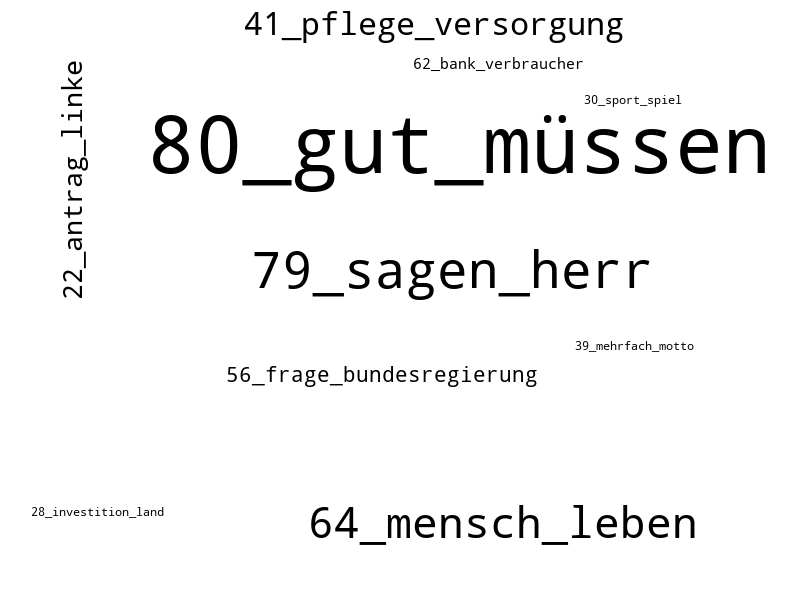

In [13]:
wordclouds['14664_sess241_top1490_spk241_seq14665']